In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(plotly)
library(ggpubr)

In [12]:
batfecal = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batfecal.rds")
batskin = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batskin.rds")
batoral = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batoral.rds")


In [29]:
batrun = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batrun.rds")

In [3]:
batfecal.00.dist.wunif = readRDS( "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batfecal.00.dist.wunif.rds")
batoral.00.dist.wunif = readRDS( "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batoral.00.dist.wunif.rds")
batskin.00.dist.wunif = readRDS( "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batskin.00.dist.wunif.rds")
batfecal.00.dist.unif = readRDS( "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batfecal.00.dist.unif.rds")
batoral.00.dist.unif = readRDS( "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batoral.00.dist.unif.rds")
batskin.00.dist.unif = readRDS( "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batskin.00.dist.unif.rds")
batfecal.00.dist.bc = readRDS( "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batfecal.00.dist.bc.rds")
batoral.00.dist.bc = readRDS( "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batoral.00.dist.bc.rds")
batskin.00.dist.bc = readRDS( "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batskin.00.dist.bc.rds")

In [11]:
#batskin_wuf = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batskin.00.dist.unif.rds")
batfecal_uf = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/old_batfecal/unifrac/batfecal.dist.unif.rds")
#batoral_wuf = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batoral.00.dist.unif.rds")


#### All bat data combined - Wuf

In [4]:
sample_tab = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Metadata_files/FullMetaData_Bat_All_updated_2.csv")

In [27]:
batsall.00.dist.wunif = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batsall.00.dist.wunif")


In [33]:
beta.disp.wuf = betadisper(batsall.00.dist.wunif,group = sample_data(batrun)$Host_Genus)
beta.disp.wuf = beta.disp.wuf$distances
beta.disp.wuf = data.frame(d = beta.disp.wuf, X.SampleID = names(beta.disp.wuf))
beta.disp.wuf2 = left_join(beta.disp.wuf, sample_tab, by="X.SampleID")

missing observations due to 'group' removed
Warning message:
“Column `X.SampleID` joining factors with different levels, coercing to character vector”

In [34]:
kruskal.test(d~Host_Genus, data=beta.disp.wuf2)

dunn.test(beta.disp.wuf2$d, beta.disp.wuf2$Host_Genus, method = "Bonferroni")


	Kruskal-Wallis rank sum test

data:  d by Host_Genus
Kruskal-Wallis chi-squared = 166.83, df = 16, p-value < 2.2e-16


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 166.8315, df = 16, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   Chaereph    Coleura   Epomopho   Hipposid   Micropte   Miniopte
---------+------------------------------------------------------------------
 Coleura |   1.139853
         |     1.0000
         |
Epomopho |   5.117535   3.707987
         |    0.0000*    0.0142*
         |
Hipposid |  -0.019692  -1.452767  -6.726938
         |     1.0000     1.0000    0.0000*
         |
Micropte |   4.911745   4.068174   1.722115   5.379655
         |    0.0001*    0.0032*     1.0000    0.0000*
         |
Miniopte |  -1.595351  -2.927112  -8.502233  -2.985607  -6.238755
         |     1.0000     0.2326    0.0000*     0.1925    0.0000*
         |
Myonycte |   1.887164   0.952533  -1.948297   2.167973  -2.923086   

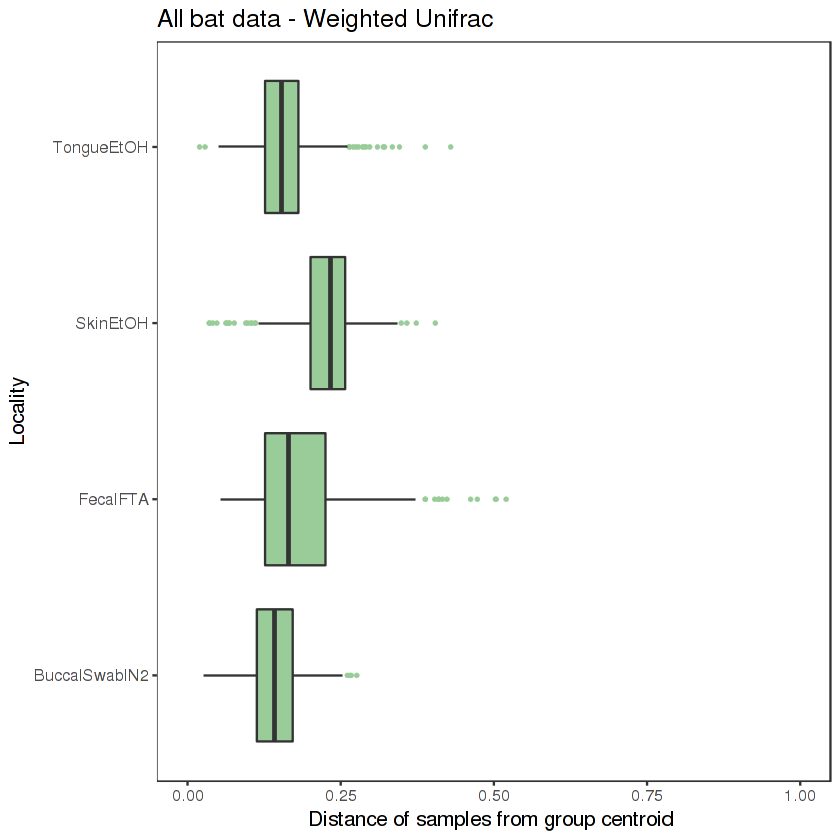

In [35]:
### HEX Codes
#skin/green: #99CC99
#oral/red: #FFCCCC
#fecal/blue: #CCCCFF

p = ggplot(beta.disp.wuf2, aes(x = as.factor(SampleType), y = d, fill = as.factor(SampleType))) + ggtitle("All bat data - Weighted Unifrac")

p = p + geom_boxplot(outlier.stroke = 0.2, outlier.shape=20, outlier.color = "#99CC99", fill = "#99CC99") + 
        ylab("Distance of samples from group centroid ") + 
        xlab("Locality") + 
        coord_flip(ylim = c(0,1))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family = "Arial"),
                           legend.key = element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="none")
                           #axis.title.x=element_blank(),
                           #axis.title.y=element_text(margin=margin(0,10,0,0)))

#p = p + geom_hline(yintercept = 0.1975)
p

#### Group by Ecto_status

In [23]:
beta.disp.skin.wuf = betadisper(batskin.00.dist.wunif,group = sample_data(batskin)$Ecto_status)
beta.disp.skin.wuf = beta.disp.skin.wuf$distances
beta.disp.skin.wuf = data.frame(d = beta.disp.skin.wuf, X.SampleID = names(beta.disp.skin.wuf))
beta.disp.skin.wuf2 = left_join(beta.disp.skin.wuf, sample_tab, by="X.SampleID")

Warning message:
“Column `X.SampleID` joining factors with different levels, coercing to character vector”

In [24]:
skin.wuf2.betadisper.kw = kruskal.test(d~Ecto_status, data=beta.disp.skin.wuf2)
summary(skin.wuf2.betadisper.kw)

dunn.test(beta.disp.skin.wuf2$d, beta.disp.skin.wuf2$Ecto_status, method = "Bonferroni")

          Length Class  Mode     
statistic 1      -none- numeric  
parameter 1      -none- numeric  
p.value   1      -none- numeric  
method    1      -none- character
data.name 1      -none- character

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 1.9423, df = 1, p-value = 0.16


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          0
---------+-----------
       1 |   1.393661
         |     0.0817

alpha = 0.05
Reject Ho if p <= alpha/2


In [25]:
avg_obs <- aggregate(d ~ Ecto_status, data = beta.disp.skin.wuf2, mean)
beta.disp.skin.wuf2$Ecto_status <-factor(beta.disp.skin.wuf2$Ecto_status, levels=avg_obs[order(avg_obs$d), "Ecto_status"])

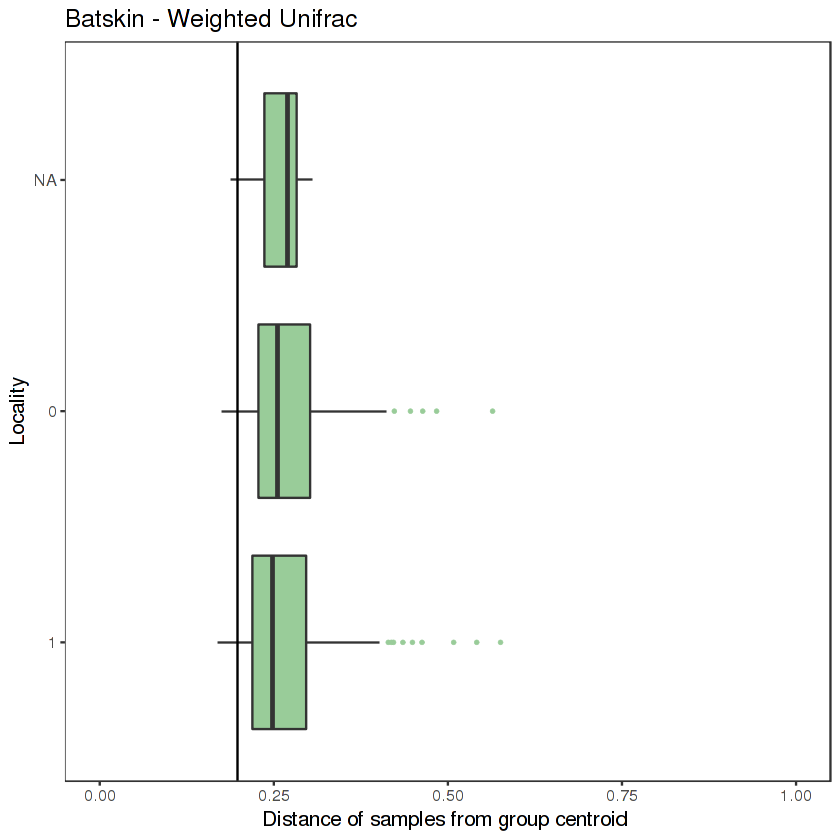

In [26]:
### HEX Codes
#skin/green: #99CC99
#oral/red: #FFCCCC
#fecal/blue: #CCCCFF

p = ggplot(beta.disp.skin.wuf2, aes(x = as.factor(Ecto_status), y = d, fill = as.factor(Ecto_status))) + ggtitle("Batskin - Weighted Unifrac")

p = p + geom_boxplot(outlier.stroke = 0.2, outlier.shape=20, outlier.color = "#99CC99", fill = "#99CC99") + 
        ylab("Distance of samples from group centroid ") + 
        xlab("Locality") + 
        coord_flip(ylim = c(0,1))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family = "Arial"),
                           legend.key = element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="none")
                           #axis.title.x=element_blank(),
                           #axis.title.y=element_text(margin=margin(0,10,0,0)))

#p = p + geom_hline(yintercept = 0.1975)
p

#### Group by locality

In [13]:
beta.disp.skin.wuf = betadisper(batskin.00.dist.wunif,group = sample_data(batskin)$Locality)
beta.disp.skin.wuf = beta.disp.skin.wuf$distances
beta.disp.skin.wuf = data.frame(d = beta.disp.skin.wuf, X.SampleID = names(beta.disp.skin.wuf))
beta.disp.skin.wuf2 = left_join(beta.disp.skin.wuf, sample_tab, by="X.SampleID")

Warning message:
“Column `X.SampleID` joining factors with different levels, coercing to character vector”

In [20]:
skin.wuf2.betadisper.kw = kruskal.test(d~Locality, data=beta.disp.skin.wuf2)
summary(skin.wuf2.betadisper.kw)

dunn.test(beta.disp.skin.wuf2$d, beta.disp.skin.wuf2$Locality, method = "Bonferroni")

          Length Class  Mode     
statistic 1      -none- numeric  
parameter 1      -none- numeric  
p.value   1      -none- numeric  
method    1      -none- character
data.name 1      -none- character

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 93.5696, df = 18, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |     Acholi     Aringa   Buzambul     Chyulu   Diatomit    Ikhondo
---------+------------------------------------------------------------------
  Aringa |  -4.330421
         |    0.0013*
         |
Buzambul |  -1.163988   0.905377
         |     1.0000     1.0000
         |
  Chyulu |   1.744150   5.416748   1.859892
         |     1.0000    0.0000*     1.0000
         |
Diatomit |  -1.350288   3.197244   0.640884  -2.901684
         |     1.0000     0.1186     1.0000     0.3173
         |
 Ikhondo |   1.091147   2.831269   1.637160   0.446740   1.539236
         |     1.0000     0.3964     1.0000     1.0000     1.0000
         |
  Kaboga |   1.278070   4.773070   1.697415  -0.245032   2.323415  -0

In [21]:
avg_obs <- aggregate(d ~ Locality, data = beta.disp.skin.wuf2, mean)
beta.disp.skin.wuf2$Locality <-factor(beta.disp.skin.wuf2$Locality, levels=avg_obs[order(avg_obs$d), "Locality"])

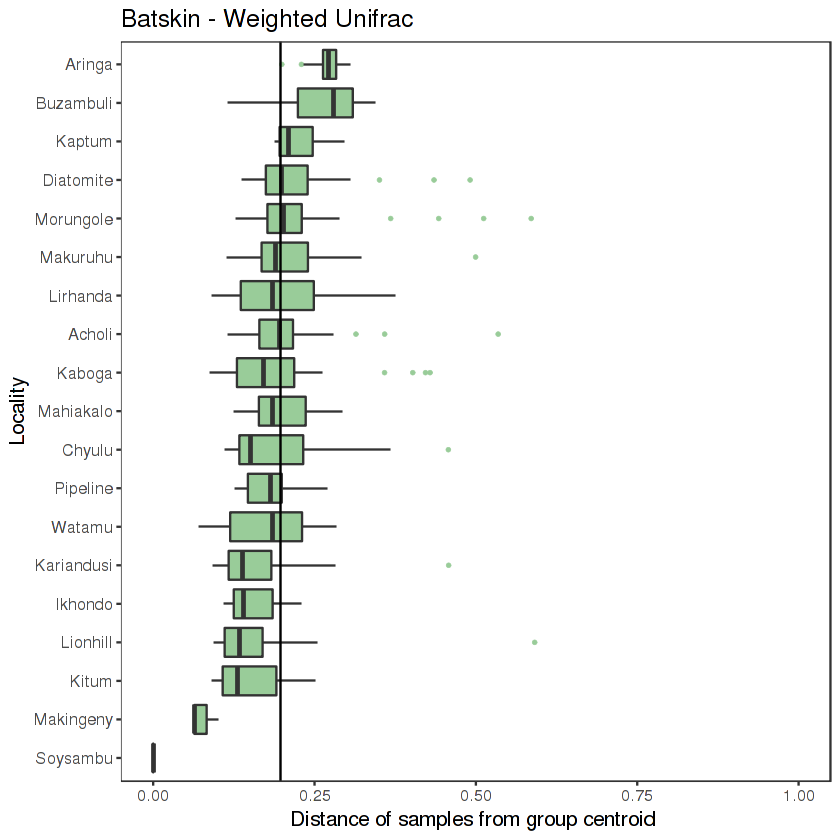

In [22]:
### HEX Codes
#skin/green: #99CC99
#oral/red: #FFCCCC
#fecal/blue: #CCCCFF

p = ggplot(beta.disp.skin.wuf2, aes(x = as.factor(Locality), y = d, fill = as.factor(Locality))) + ggtitle("Batskin - Weighted Unifrac")

p = p + geom_boxplot(outlier.stroke = 0.2, outlier.shape=20, outlier.color = "#99CC99", fill = "#99CC99") + 
        ylab("Distance of samples from group centroid ") + 
        xlab("Locality") + 
        coord_flip(ylim = c(0,1))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family = "Arial"),
                           legend.key = element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="none")
                           #axis.title.x=element_blank(),
                           #axis.title.y=element_text(margin=margin(0,10,0,0)))

p = p + geom_hline(yintercept = 0.1975)
p

#### Group by Host_taxon

In [64]:
beta.disp.skin.wuf = betadisper(batskin.00.dist.wunif,group = sample_data(batskin)$Host_taxon)
beta.disp.skin.wuf = beta.disp.skin.wuf$distances
beta.disp.skin.wuf = data.frame(d = beta.disp.skin.wuf, X.SampleID = names(beta.disp.skin.wuf))
beta.disp.skin.wuf2 = left_join(beta.disp.skin.wuf, sample_tab, by="X.SampleID")

Warning message:
“Column `X.SampleID` joining factors with different levels, coercing to character vector”

In [65]:
write.csv(beta.disp.skin.wuf2 ,"/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/betadisper/beta.disp.skin.wuf2.csv")

In [6]:
#read in save results from above
setwd("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/betadisper/")

beta.disp.fecal.wuf2 = read.csv("beta.disp.fecal.wuf2.csv")
beta.disp.fecal.uf2 = read.csv("beta.disp.fecal.uf2.csv")
beta.disp.fecal.bray2 = read.csv("beta.disp.fecal.bray2.csv")

beta.disp.oral.wuf2 = read.csv("beta.disp.oral.wuf2.csv")
beta.disp.oral.uf2 = read.csv("beta.disp.oral.uf2.csv")
beta.disp.oral.bray2 = read.csv("beta.disp.oral.bray2.csv")

beta.disp.skin.wuf2 = read.csv("beta.disp.skin.wuf2.csv")
beta.disp.skin.uf2 = read.csv("beta.disp.skin.uf2.csv")
beta.disp.skin.bray2 = read.csv("beta.disp.skin.bray2.csv")

In [8]:
fecal.wuf2.betadisper.anova = krusk(d~Host_taxon, data=beta.disp.fecal.wuf2)
summary(fecal.wuf2.betadisper.anova)

TukeyHSD(x=fecal.wuf2.betadisper.anova, 'Host_taxon', conf.level=0.95)

             Df Sum Sq Mean Sq F value  Pr(>F)    
Host_taxon   30  1.214 0.04047     3.2 1.1e-07 ***
Residuals   371  4.692 0.01265                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = d ~ Host_taxon, data = beta.disp.fecal.wuf2)

$Host_taxon
                                                              diff          lwr
Coleura_afra-Chaerephon_bivitattus                   -5.640943e-02 -0.234568577
Epomophorus_sp-Chaerephon_bivitattus                 -1.379731e-01 -0.384390014
Epomophorus_wahlbergi-Chaerephon_bivitattus          -1.610737e-01 -0.364060747
Hipposideros_caffer-Chaerephon_bivitattus            -4.317463e-02 -0.182518438
Hipposideros_camerunensis-Chaerephon_bivitattus      -5.504304e-02 -0.381022005
Hipposideros_ruber-Chaerephon_bivitattus             -5.318793e-02 -0.209035685
Hipposideros_vittatus-Chaerephon_bivitattus          -4.282495e-02 -0.231028990
Micropteropus_sp-Chaerephon_bivitattus               -1.746939e-01 -0.450196376
Miniopterus_africanus-Chaerephon_bivitattus          -7.594037e-02 -0.227928849
Miniopterus_inflatus rufus-Chaerephon_bivitattu

In [10]:
beta.disp.fecal.wuf2.kw = kruskal.test(d~Host_taxon, data=beta.disp.fecal.wuf2)
beta.disp.fecal.wuf2.kw

library(dunn.test)
dunn.test(beta.disp.fecal.wuf2$d, beta.disp.fecal.wuf2$Host_taxon, method = "Bonferroni")


	Kruskal-Wallis rank sum test

data:  d by Host_taxon
Kruskal-Wallis chi-squared = 119.25, df = 30, p-value = 1.364e-12


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 119.247, df = 30, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   Chaereph   Coleura_   Epomopho   Epomopho   Hipposid   Hipposid
---------+------------------------------------------------------------------
Coleura_ |   0.715853
         |     1.0000
         |
Epomopho |   2.270809   1.733658
         |     1.0000     1.0000
         |
Epomopho |   3.310532   2.638416   0.420272
         |     0.2165     1.0000     1.0000
         |
Hipposid |   1.161485   0.237915  -1.782631  -2.932677
         |     1.0000     1.0000     1.0000     0.7813
         |
Hipposid |   0.265749  -0.124683  -1.279504  -1.710564  -0.243629
         |     1.0000     1.0000     1.0000     1.0000     1.0000
         |
Hipposid |   1.535179   0.697306  -1.370190  -2.308760   0.670094   0

### Plot distance from group centroid with sorting

In [66]:
avg_obs <- aggregate(d ~ Host_taxon, data = beta.disp.skin.wuf2, mean)
beta.disp.skin.wuf2$Host_taxon <-factor(beta.disp.skin.wuf2$Host_taxon, levels=avg_obs[order(avg_obs$d), "Host_taxon"])

In [29]:
#Fecal
batfecal.bray_summary = summary(beta.disp.fecal.bray2$d)
batfecal.bray_summary
batfecal.uf_summary = summary(beta.disp.fecal.uf2$d)
batfecal.uf_summary
batfecal.wuf_summary = summary(beta.disp.fecal.wuf2$d)
batfecal.wuf_summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4704  0.5854  0.5474  0.6549  0.8994 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3551  0.4194  0.4232  0.4934  0.7303 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.08912 0.15148 0.18208 0.25651 0.56137 

In [71]:
batfecal.bray.summary = beta.disp.fecal.bray2 %>%
    summarise(avg = mean(d), 
              sd = sd(d), 
              sem = sd/sqrt(length(d)))
batfecal.bray.summary

avg,sd,sem
0.5474215,0.1696564,0.008461693


In [47]:
#Oral
batoral.bray_summary = summary(beta.disp.oral.bray2$d)
batoral.bray_summary
batoral.uf_summary = summary(beta.disp.oral.uf2$d)
batoral.uf_summary
batoral.wuf_summary = summary(beta.disp.oral.wuf2$d)
batoral.wuf_summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2155  0.3816  0.3968  0.5767  0.9605 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4052  0.4582  0.4491  0.5116  0.6972 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.06697 0.12373 0.14959 0.21519 0.58814 

In [67]:
#Skin
batskin.bray_summary = summary(beta.disp.skin.bray2$d)
batskin.bray_summary
batskin.uf_summary = summary(beta.disp.skin.uf2$d)
batskin.uf_summary
batskin.wuf_summary = summary(beta.disp.skin.wuf2$d)
batskin.wuf_summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4584  0.5203  0.5173  0.5985  0.8006 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4037  0.4373  0.4374  0.4748  0.7471 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1457  0.1850  0.1975  0.2395  0.5814 

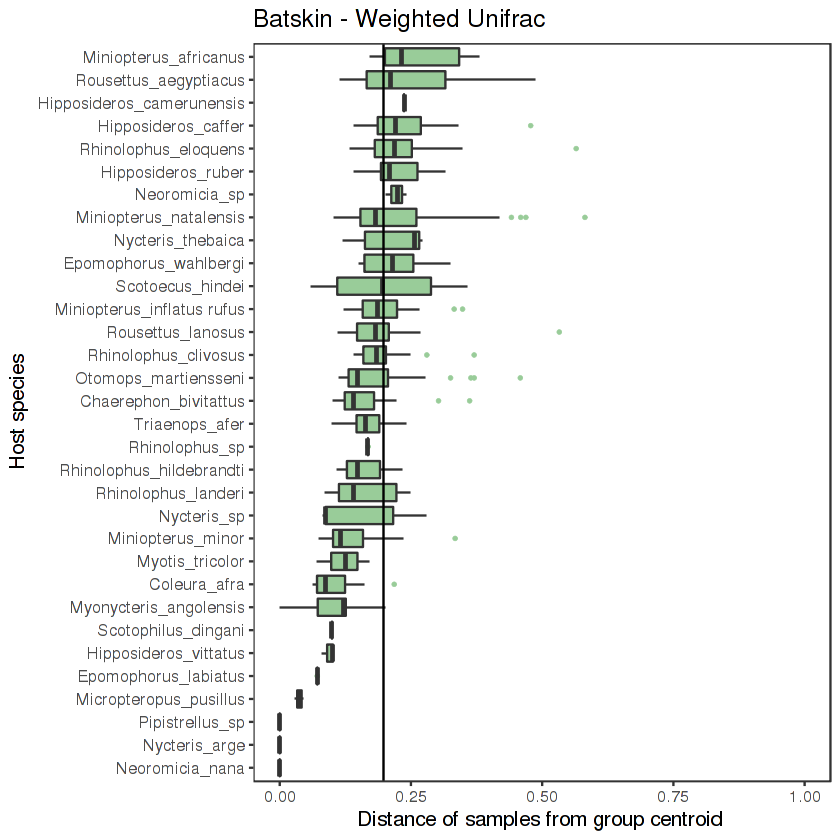

In [69]:
### HEX Codes
#skin/green: #99CC99
#oral/red: #FFCCCC
#fecal/blue: #CCCCFF

p = ggplot(beta.disp.skin.wuf2, aes(x = as.factor(Host_taxon), y = d, fill = as.factor(Host_taxon))) + ggtitle("Batskin - Weighted Unifrac")

p = p + geom_boxplot(outlier.stroke = 0.2, outlier.shape=20, outlier.color = "#99CC99", fill = "#99CC99") + 
        ylab("Distance of samples from group centroid ") + 
        xlab("Host species") + 
        coord_flip(ylim = c(0,1))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family = "Arial"),
                           legend.key = element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="none")
                           #axis.title.x=element_blank(),
                           #axis.title.y=element_text(margin=margin(0,10,0,0)))

p = p + geom_hline(yintercept = 0.1975)
p

### Checking for normal distribution and equal variance
##### Before proceeding with ANOVA or Kruskal-Wallis

In [5]:
#Combine data for easier comparison

braydata = rbind(beta.disp.fecal.bray2,beta.disp.oral.bray2,beta.disp.skin.bray2)
ufdata = rbind(beta.disp.fecal.uf2,beta.disp.oral.uf2,beta.disp.skin.uf2)
wufdata = rbind(beta.disp.fecal.wuf2,beta.disp.oral.wuf2,beta.disp.skin.wuf2)

#write.csv(braydata, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/betadisper/braydata_allsamples.betadisper.csv")
#write.csv(ufdata, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/betadisper/ufdata_allsamples.betadisper.csv")
#write.csv(wufdata, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/betadisper/wufdata_allsamples.betadisper.csv")

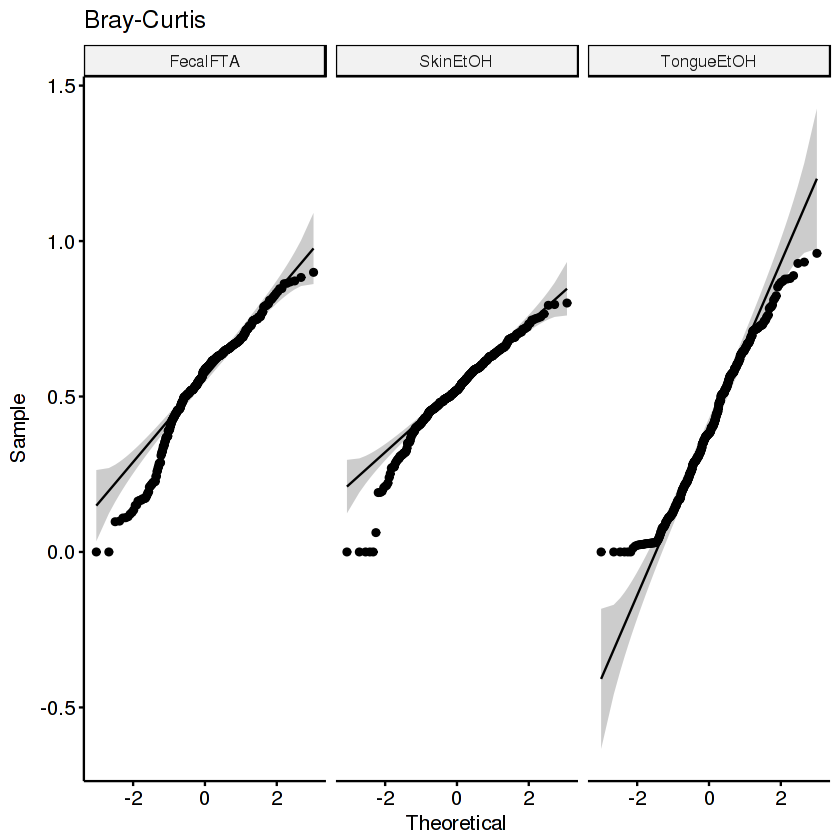

In [86]:
#BRAY-CURTIS DISTRIBUTION
p = ggqqplot(braydata, x = "d", main="Bray-Curtis") 
p = p + facet_wrap("SampleType")
p

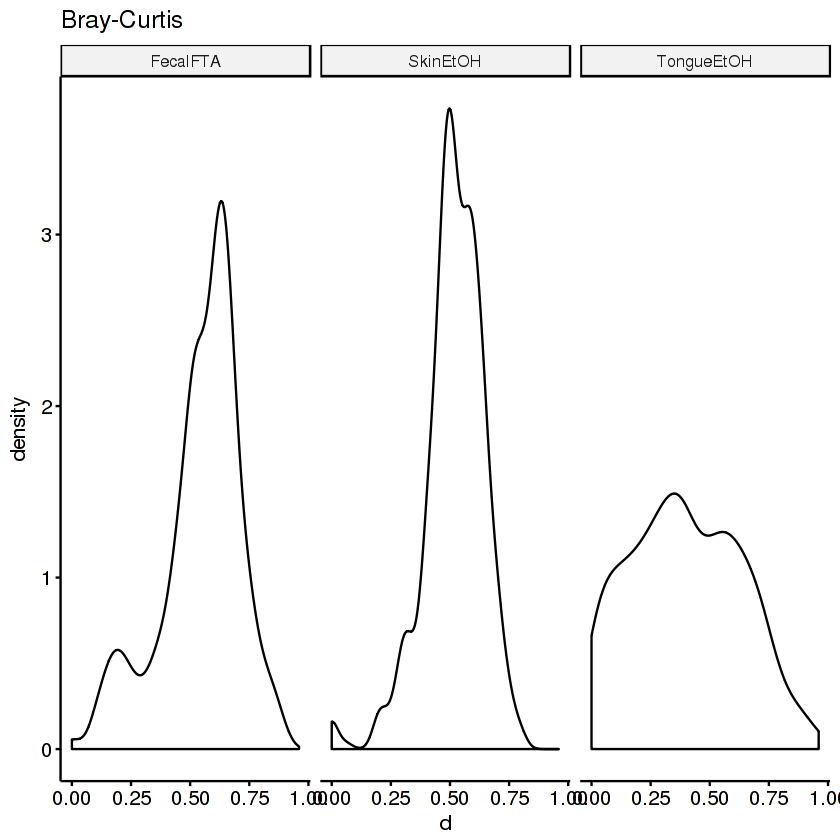

In [109]:
p = ggdensity(braydata, x = "d", main="Bray-Curtis") 
p = p + facet_wrap("SampleType")
p

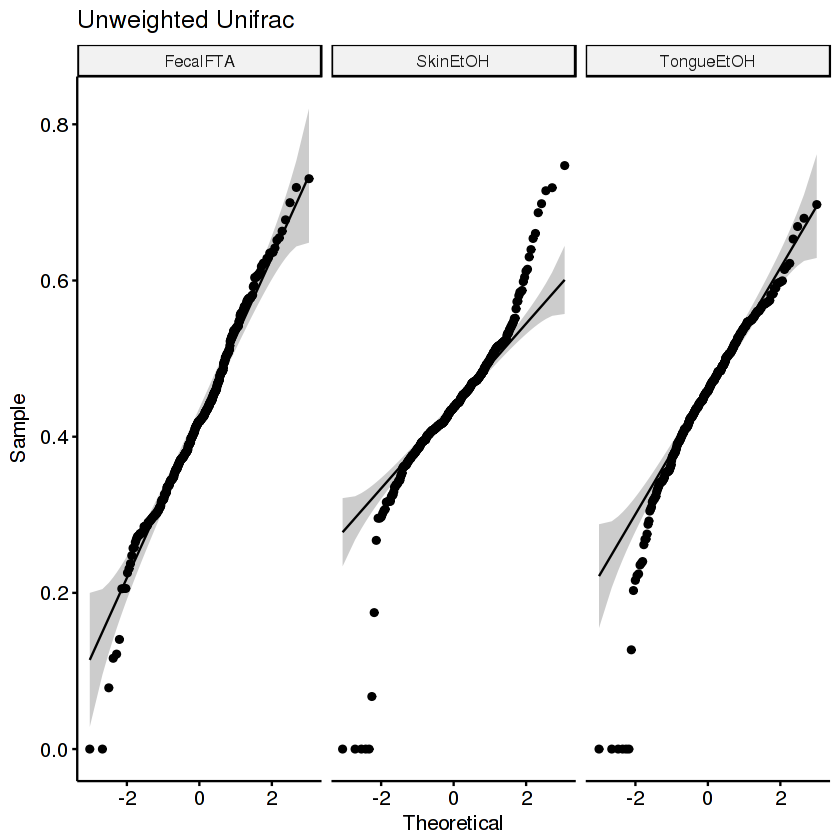

In [88]:
#UNWEIGHTED UNIFRAC DISTRIBUTION
p = ggqqplot(ufdata, x = "d", main="Unweighted Unifrac") 
p = p + facet_wrap("SampleType")
p

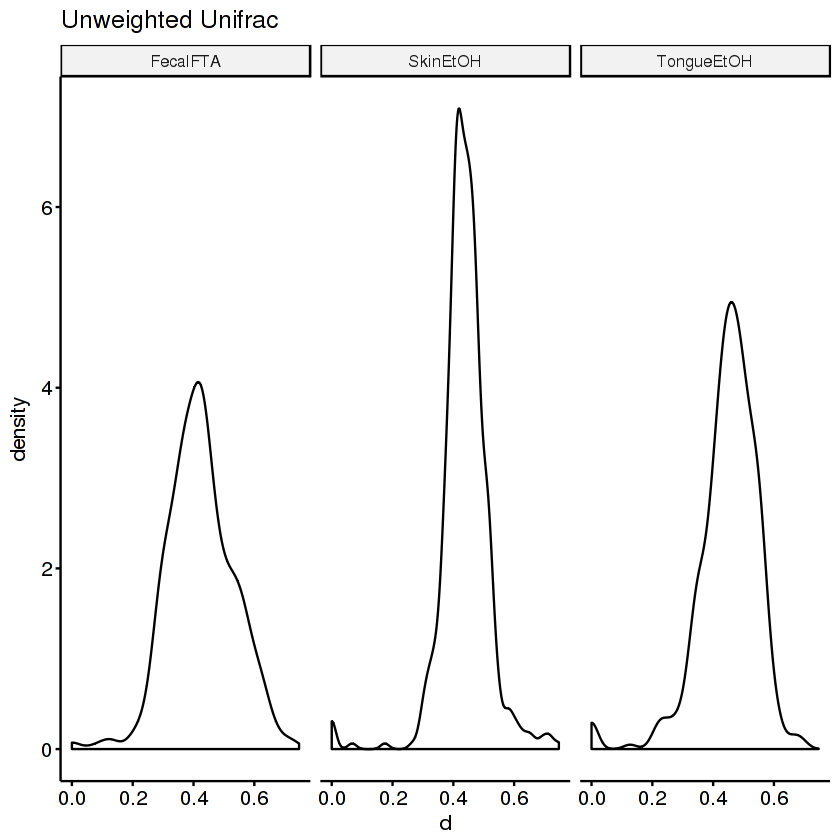

In [107]:
p = ggdensity(ufdata, x = "d", main="Unweighted Unifrac") 
p = p + facet_wrap("SampleType")
p

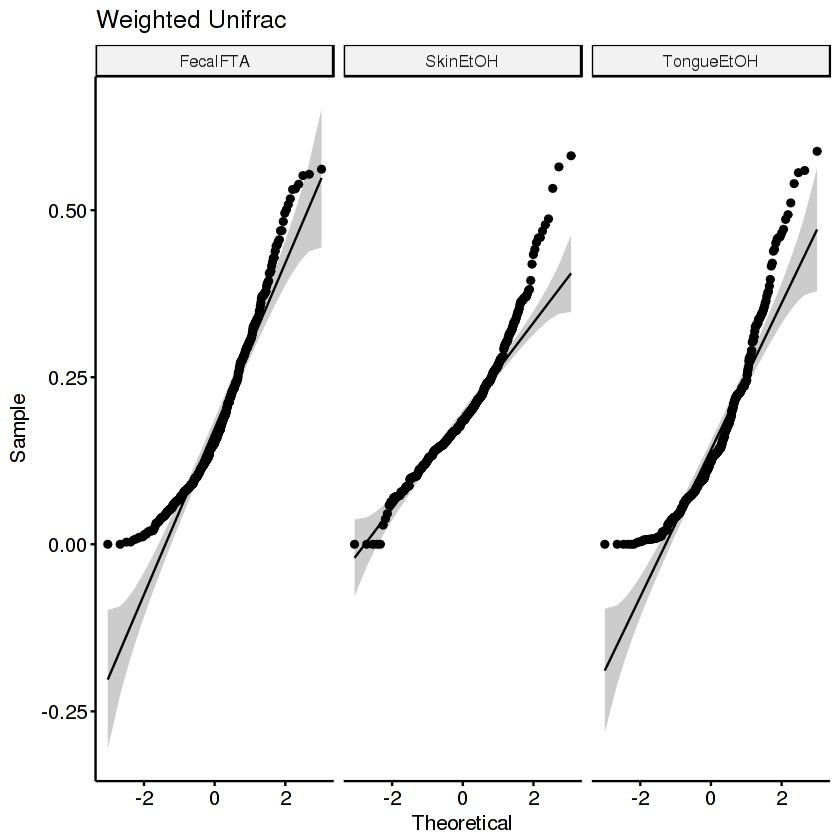

In [87]:
#WEIGHTED UNIFRAC DISTRIBUTION
p = ggqqplot(wufdata, x = "d", main="Weighted Unifrac") 
p = p + facet_wrap("SampleType")
p

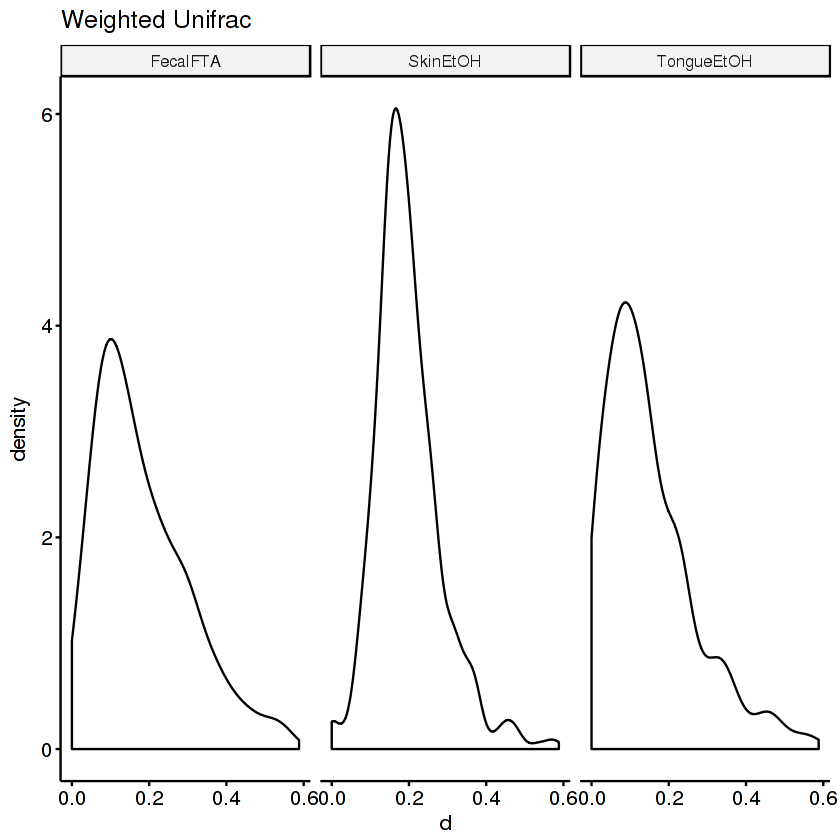

In [108]:
p = ggdensity(wufdata, x = "d", main="Weighted Unifrac") 
p = p + facet_wrap("SampleType")
p

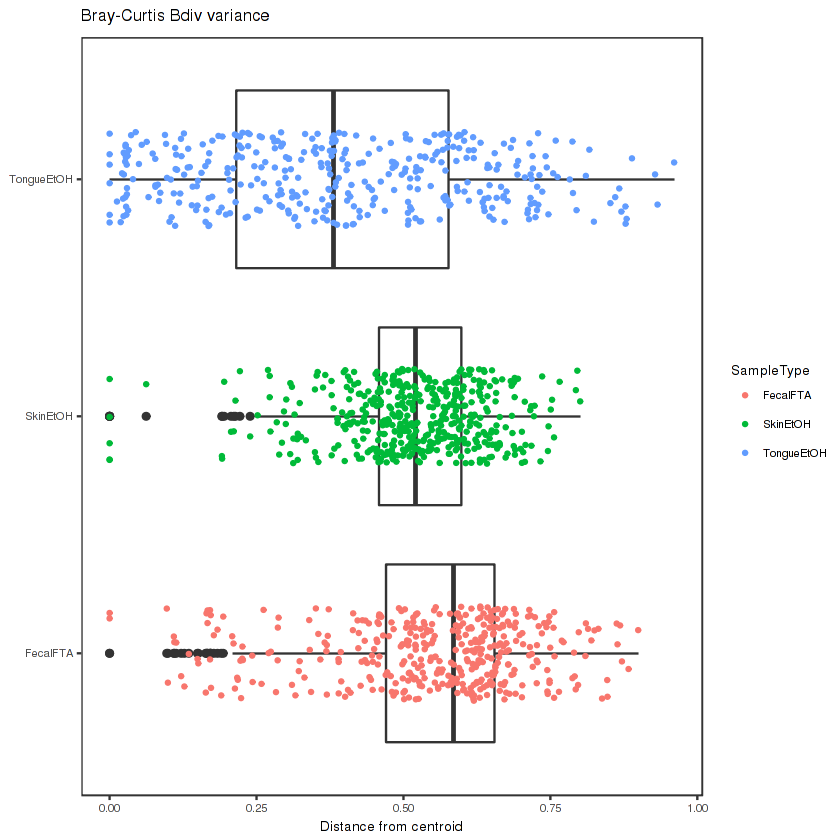

In [91]:
#BRAY-CURTIS VARIANCE
p = ggplot(braydata, aes(x = SampleType, y = d)) + ggtitle("Bray-Curtis Bdiv variance")

p = p + geom_boxplot() + ylab("Distance from centroid") + coord_flip()

p = p + geom_point(size = .75, aes(color = SampleType),  
                   position = position_jitter(h = 0, w = 0.2))

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

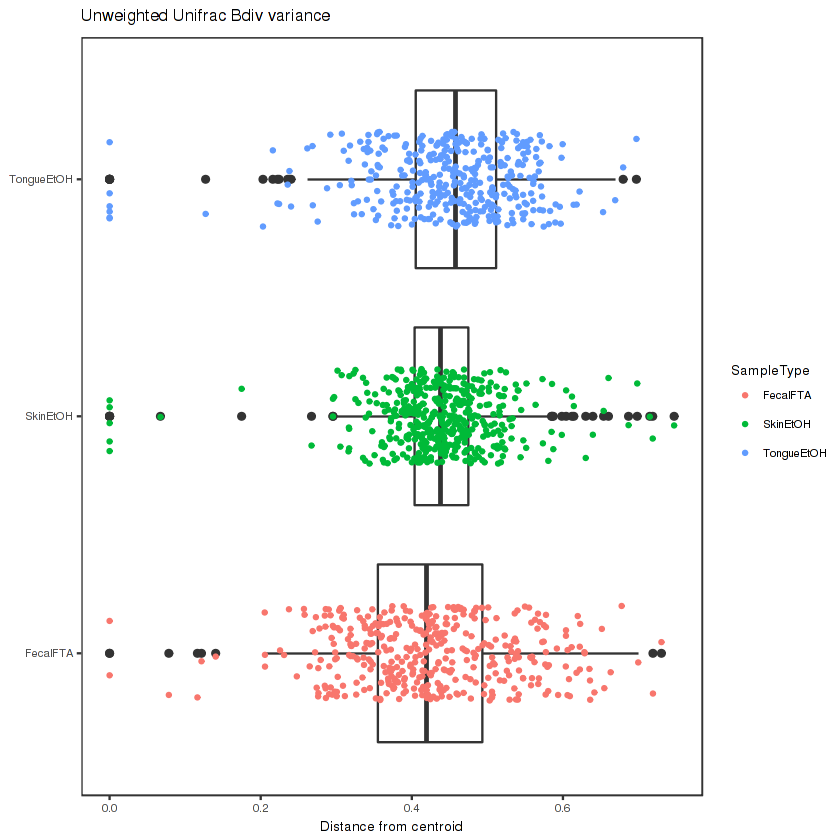

In [92]:
#UNWEIGHTED UNIFRAC VARIANCE
p = ggplot(ufdata, aes(x = SampleType, y = d)) + ggtitle("Unweighted Unifrac Bdiv variance")

p = p + geom_boxplot() + ylab("Distance from centroid") + coord_flip()

p = p + geom_point(size = .75, aes(color = SampleType),  
                   position = position_jitter(h = 0, w = 0.2))

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

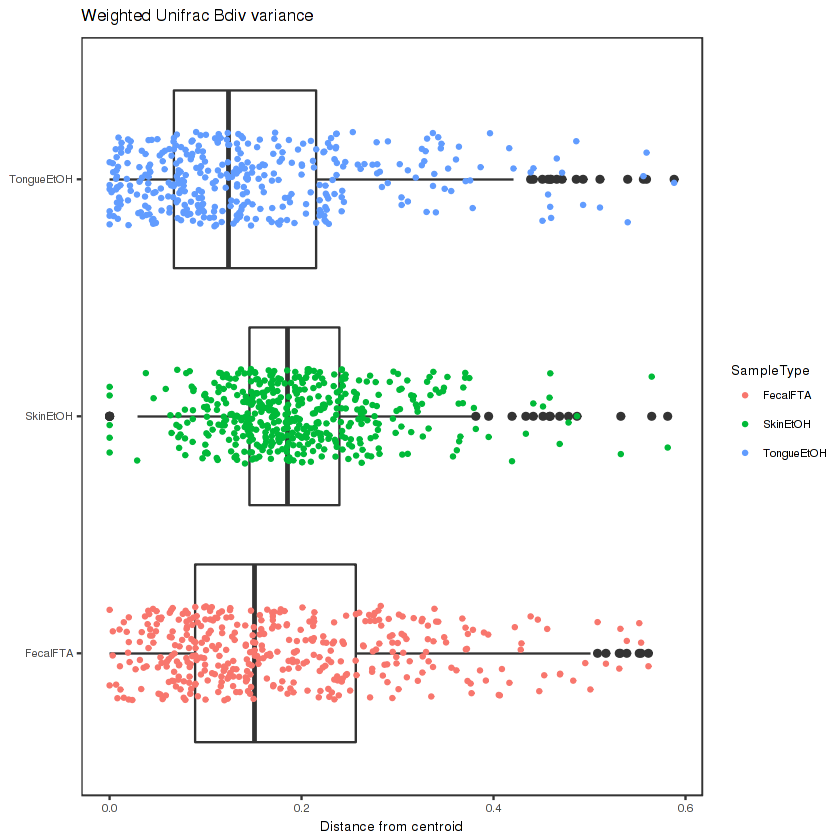

In [94]:
#WEIGHTED UNIFRAC VARIANCE
p = ggplot(wufdata, aes(x = SampleType, y = d)) + ggtitle("Weighted Unifrac Bdiv variance")

p = p + geom_boxplot() + ylab("Distance from centroid") + coord_flip()

p = p + geom_point(size = .75, aes(color = SampleType),  
                   position = position_jitter(h = 0, w = 0.2))

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

#### Running ANOVA 

In [11]:
#BRAY

bray.betadisper.anova = aov(d~SampleType, data=braydata)
summary(bray.betadisper.anova)

TukeyHSD(x=bray.betadisper.anova, 'SampleType', conf.level=0.95)

              Df Sum Sq Mean Sq F value Pr(>F)    
SampleType     2   4.93  2.4657   77.79 <2e-16 ***
Residuals   1233  39.08  0.0317                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = d ~ SampleType, data = braydata)

$SampleType
                           diff         lwr          upr     p adj
TongueEtOH-FecalFTA -0.15061395 -0.18058686 -0.120641046 0.0000000
SkinEtOH-FecalFTA   -0.03015094 -0.05870379 -0.001598089 0.0355887
SkinEtOH-TongueEtOH  0.12046301  0.09138917  0.149536852 0.0000000


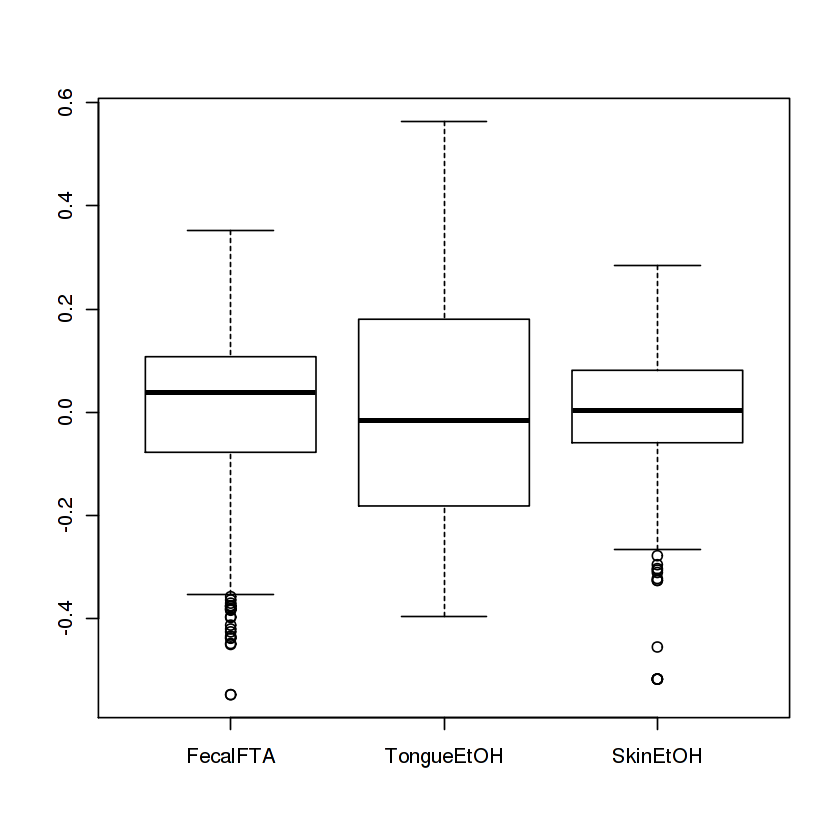

In [12]:
#Check variance:
boxplot(split(resid(bray.betadisper.anova), braydata$SampleType))

In [33]:
bray.betadisper.kw = kruskal.test(d~SampleType, data=braydata)
bray.betadisper.kw

library(dunn.test)
dunn.test(braydata$d, braydata$SampleType, method = "Bonferroni")


	Kruskal-Wallis rank sum test

data:  d by SampleType
Kruskal-Wallis chi-squared = 116.27, df = 2, p-value < 2.2e-16


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 116.2707, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   FecalFTA   SkinEtOH
---------+----------------------
SkinEtOH |   3.838324
         |    0.0002*
         |
TongueEt |   10.63083   7.190036
         |    0.0000*    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


In [7]:
#WUF

wuf.betadisper.anova = aov(d~SampleType, data=wufdata)
summary(wuf.betadisper.anova)

TukeyHSD(x=wuf.betadisper.anova, 'SampleType', conf.level=0.95)

              Df Sum Sq Mean Sq F value   Pr(>F)    
SampleType     2  0.485 0.24256   20.68 1.47e-09 ***
Residuals   1233 14.462 0.01173                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = d ~ SampleType, data = wufdata)

$SampleType
                           diff          lwr         upr     p adj
TongueEtOH-FecalFTA -0.03249475 -0.050727171 -0.01426233 0.0000916
SkinEtOH-FecalFTA    0.01545881 -0.001909797  0.03282741 0.0926092
SkinEtOH-TongueEtOH  0.04795356  0.030268040  0.06563908 0.0000000


In [31]:
wuf.betadisper.kw = kruskal.test(d~SampleType, data=wufdata)
wuf.betadisper.kw

library(dunn.test)
dunn.test(wufdata$d, wufdata$SampleType, method = "Bonferroni")


	Kruskal-Wallis rank sum test

data:  d by SampleType
Kruskal-Wallis chi-squared = 77.285, df = 2, p-value < 2.2e-16


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 77.2849, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   FecalFTA   SkinEtOH
---------+----------------------
SkinEtOH |  -4.339831
         |    0.0000*
         |
TongueEt |   4.386664   8.784380
         |    0.0000*    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


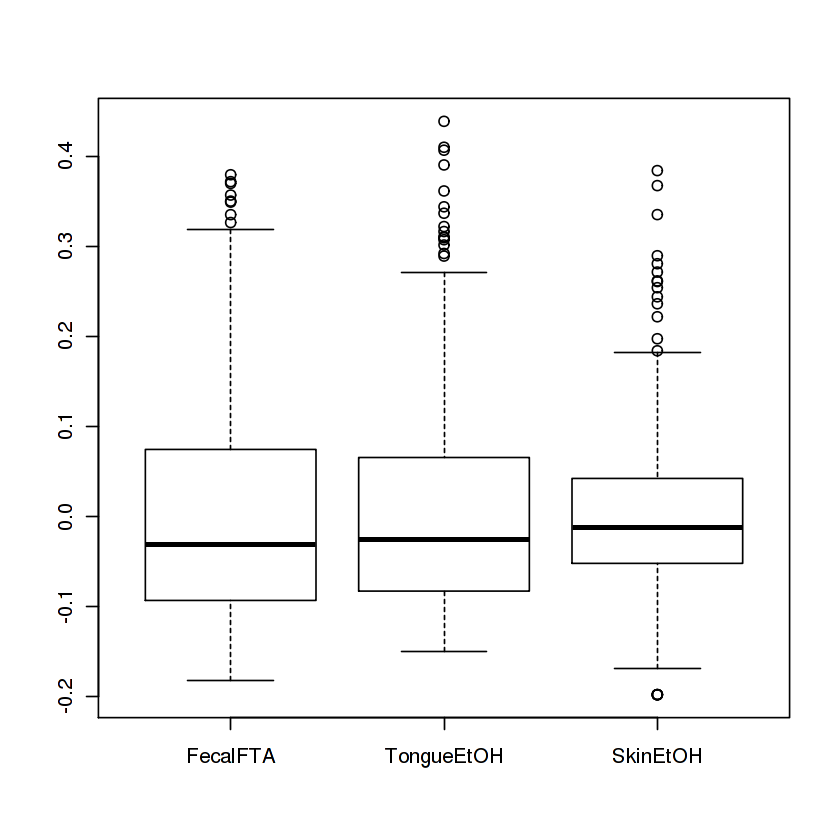

In [13]:
#Check variance:
boxplot(split(resid(wuf.betadisper.anova), wufdata$SampleType))

In [14]:
# UF

uf.betadisper.anova = aov(d~SampleType, data=ufdata)
summary(uf.betadisper.anova)

TukeyHSD(x=uf.betadisper.anova, 'SampleType', conf.level=0.95)

              Df Sum Sq Mean Sq F value  Pr(>F)    
SampleType     2  0.132 0.06596   6.967 0.00098 ***
Residuals   1233 11.674 0.00947                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = d ~ SampleType, data = ufdata)

$SampleType
                           diff          lwr         upr     p adj
TongueEtOH-FecalFTA  0.02597660  0.009595872 0.042357332 0.0006067
SkinEtOH-FecalFTA    0.01423654 -0.001368103 0.029841185 0.0821897
SkinEtOH-TongueEtOH -0.01174006 -0.027629435 0.004149312 0.1930205


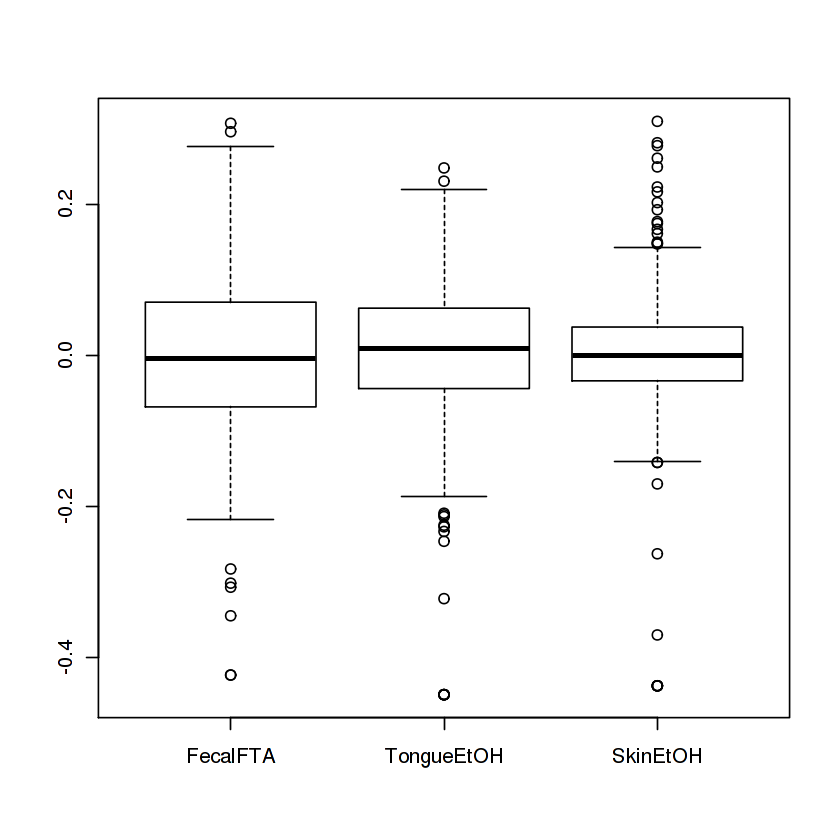

In [15]:
#Check variance:
boxplot(split(resid(uf.betadisper.anova), ufdata$SampleType))

In [32]:
uf.betadisper.kw = kruskal.test(d~SampleType, data=ufdata)
uf.betadisper.kw

library(dunn.test)
dunn.test(ufdata$d, ufdata$SampleType, method = "Bonferroni")


	Kruskal-Wallis rank sum test

data:  d by SampleType
Kruskal-Wallis chi-squared = 31.837, df = 2, p-value = 1.221e-07


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 31.8366, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   FecalFTA   SkinEtOH
---------+----------------------
SkinEtOH |  -2.698847
         |    0.0104*
         |
TongueEt |  -5.639253  -3.163154
         |    0.0000*    0.0023*

alpha = 0.05
Reject Ho if p <= alpha/2


### Updated ADONIS tests - 7 Feb 2018

In [7]:
batskin_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batskin_.00.rds")

In [5]:
batfecal = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batfecal.rds")
batfecal_.00 = prune_taxa(taxa_sums(batfecal)>0, batfecal)
saveRDS(batfecal_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batfecal_.00.rds")

In [6]:
batoral = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batoral.rds")
batoral_.00 = prune_taxa(taxa_sums(batoral)>0, batoral)
saveRDS(batoral_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batoral_.00.rds")

In [5]:
batskin_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batskin_.00.rds")

In [20]:
batskin_.00 = prune_taxa(taxa_sums(batskin)>0, batskin)
saveRDS(batskin_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batskin_.00.rds")

hipposkin = subset_samples(batskin, Host_Genus=="Hipposideros")
hipposkin_.00 = prune_taxa(taxa_sums(hipposkin)>0, hipposkin)
saveRDS(hipposkin_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/hipposkin_.00.rds")

miniskin = subset_samples(batskin, Host_Genus=="Miniopterus")
miniskin_.00 = prune_taxa(taxa_sums(miniskin)>0, miniskin)
saveRDS(miniskin_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/miniskin_.00.rds")

rhinoskin = subset_samples(batskin, Host_Genus=="Rhinolophus")
rhinoskin_.00 = prune_taxa(taxa_sums(rhinoskin)>0, rhinoskin)
saveRDS(rhinoskin_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/rhinoskin_.00.rds")

rousskin = subset_samples(batskin, Host_Genus=="Rousettus")
rousskin_.00 = prune_taxa(taxa_sums(rousskin)>0, rousskin)
saveRDS(rousskin_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/rousskin_.00.rds")


In [21]:
batskin.00.dist.wunif = distance(batskin_.00, method = "wunifrac", type = "samples")
batskin.00.out.wuf.log = ordinate(batskin_.00, method = "PCoA", distance = "wunifrac")
batskin.00.evals = batskin.00.out.wuf.log$values$Eigenvalues
batskin.00.pcoa.plot = plot_ordination(batskin_.00, batskin.00.out.wuf.log, color = "Locality") + ggtitle("Bat Skin Microbiome") + geom_point(size=2) + coord_fixed(sqrt(batskin.00.evals[2] / batskin.00.evals[1]))

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGAACTGTGCGAACGTTATTCGGAATCACTGGGCTTACAGGGTGCGTAGGCGGCCTTGCCAGTCAGGTGTGAAATCCCCCGGCTCAACCGGGGAATGGCGCTTGAAACTGCAGGGCTTGAGTGAGCTAAGGGTGCACGGAACTTCCAG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGAAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGCGTGCGTAGGTGGTGCGTTAAGTCCGATGTGAAAGCCCTGGGCTCAACCTGGGAATGGCATTGGAAACTGGCGTGCTGGAGTACGGTAGAGGGTGGCGGAATTCCCGG -- in the phylogenetic tree in the data you provided.”

ERROR: Error in inherits(physeq, "phyloseq"): object 'batskin.00' not found


In [8]:
batskin.00.dist.wunif = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_wuf_ADONIS/batskin.00.dist.wunif.rds")
batskin.00.out.wuf.log = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_wuf_ADONIS/batskin.00.out.wuf.log.rds")
batskin.00.evals = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_wuf_ADONIS/batskin.00.evals.rds")
batskin.00.pcoa.plot =  readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_wuf_ADONIS/batskin.00.pcoa.col.locality.plot")

In [23]:
batskin.00.pcoa.plot = plot_ordination(batskin_.00, batskin.00.out.wuf.log, color = "Ecto_status", shape="Host_Genus") + ggtitle("Bat Skin Microbiome") + geom_point(size=2) + coord_fixed(sqrt(batskin.00.evals[2] / batskin.00.evals[1]))

In [27]:
p = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/miniskin/wunifrac/miniskin.pcoa.plot.rds")

In [11]:
#transform ps to df for ADONIS tests

batskin.df = data.frame(sample_data(batskin_.00))
hipposkin.df = data.frame(sample_data(hipposkin_.00))
miniskin.df = data.frame(sample_data(miniskin_.00))
rhinotskin.df = data.frame(sample_data(rhinoskin_.00))
rousskin.df = data.frame(sample_data(rousskin_.00))


In [7]:
saveRDS(batskin_.00.mdf, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_wuf_ADONIS/batskin_.00.mdf.rds")

In [ ]:
# Running ADONIS with strata = locality

In [35]:
batskin.00.wuf.adtest = adonis2(batskin.00.dist.wunif ~ Host_Genus + Host_species + Ecto_status + Haem_status, strata= Locality, by = "margin", data=batskin.df)
saveRDS(batskin.00.wuf.adtest, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batskin.00.wuf.adtest.rds")
batskin.00.wuf.adtest

beta.disp.wunif = betadisper(batskin.00.dist.wunif,group = sample_data(batskin_.00)$Ecto_status)
permutest(beta.disp.wunif)



,Df,SumOfSqs,F,Pr(>F)
Host_Genus,4,0.12779734,1.6018705,0.016
Host_species,18,2.87901745,8.0193165,0.001
Ecto_status,1,0.05038197,2.5260428,0.008
Haem_status,1,0.01709315,0.8570136,0.580
Residual,420,8.37690772,NA,NA



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups      2 0.00224 0.0011215 0.6227    999  0.536
Residuals 455 0.81953 0.0018012                     

In [15]:
batskin.00.wuf.adtest2

,Df,SumOfSqs,F,Pr(>F)
Host_Family,0,-3.552714e-15,-Inf,NA
Host_Genus,1,2.935091e-02,1.4715909,0.128
Host_species,17,2.859776e+00,8.4342929,0.001
Ecto_status,1,5.038197e-02,2.5260428,0.008
Haem_status,1,1.709315e-02,0.8570136,0.580
Residual,420,8.376908e+00,NA,NA


In [31]:
anosim = anosim(batskin.00.dist.wunif, grouping = sample_data(batskin)$Ecto_status, permutations = 1000)

In [32]:
anosim


Call:
anosim(dat = batskin.00.dist.wunif, grouping = sample_data(batskin)$Ecto_status,      permutations = 1000) 
Dissimilarity: 

ANOSIM statistic R: 0.06519 
      Significance: 0.000999 

Permutation: free
Number of permutations: 1000


# Calculate distances

## weighted unifrac

In [4]:
batfecal.dist.wunif = distance(batfecal, method = "wunifrac", type = "samples")
batfecal.out.wuf.log = ordinate(batfecal, method = "PCoA", distance = "wunifrac")
batfecal.evals = batfecal.out.wuf.log$values$Eigenvalues
batfecal.pcoa.plot = plot_ordination(batfecal, batfecal.out.wuf.log, color = "Host_Genus") + ggtitle("Bat Fecal Microbiome") + geom_point(size=2) + coord_fixed(sqrt(batfecal.evals[2] / batfecal.evals[1]))


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGAGCGAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGTAGGCGGGACGGTAAGTTAGATGTGAAATACATAGGCTCAACCTATGGGCTGCATTTAAAACTGCTGTTCTTGAGTGAAGTAGAGGTAAGCGGAATTCCTGG -- in the phylogenetic tree in the data you provided.”

In [ ]:
saveRDS(bat.dist.wunif, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/batfecal.dist.wunif.rds")
saveRDS(bat.out.wuf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal.out.wuf.log.rds")
saveRDS(bat.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal.evals.rds")
saveRDS(bat.pcoa.plot, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal.pcoa.plot.rds")

In [ ]:
#Miniopterus wunifrac

bat.dist.wunif = distance(bat, method = "wunifrac", type = "samples")
bat.out.wuf.log = ordinate(bat, method = "PCoA", distance = "wunifrac")
bat.evals = bat.out.wuf.log$values$Eigenvalues
bat.pcoa.plot = plot_ordination(bat, bat.out.wuf.log, color = "SampleType") + ggtitle("Bat Microbiome by Sample Type") + geom_point(size=2) + coord_fixed(sqrt(bat.evals[2] / bat.evals[1]))

saveRDS(bat.dist.wunif, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/bat.dist.wunif.rds")
saveRDS(bat.out.wuf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/bat.out.wuf.log.rds")
saveRDS(bat.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/bat.evals.rds")
saveRDS(bat.pcoa.plot, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/bat.pcoa.plot.rds")

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGGAGGGTGCGAGCGTTGTCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTTTTAAGTCGGCGGTGAAAGTCTGTGGCTCAACCATGGAACTGCCGTTGATACTGGGGGGCTTGAGTGCCGGTGGGGTACATGGAATTGGTGG -- in the phylogenetic tree in the data you provided.”

In [8]:
#Hipposideros wunifrac

hippofecal.dist.wunif = distance(hippofecal, method = "wunifrac", type = "samples")
hippofecal.out.wuf.log = ordinate(hippofecal, method = "PCoA", distance = "wunifrac")
hippofecal.evals = hippofecal.out.wuf.log$values$Eigenvalues

saveRDS(hippofecal.dist.wunif, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/hippofecal/wunifrac/hippofecal.dist.wunif.rds")
saveRDS(hippofecal.out.wuf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/hippofecal/wunifrac/hippofecal.out.wuf.log.rds")
saveRDS(hippofecal.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/hippofecal/wunifrac/hippofecal.evals.rds")

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACAGAGGTCTCAAGCGTTGTTCGGATTCATTGGGCGTAAAGGGTGCGTAGGTGGCGATGTAAGTCGGATGTGAAATCTCCAAGCTCAACTTGGAAACTGCATTCGATACTGCGTCGCTCGAGGACTGTAGAGGGCATTGGAATTCACGG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGGGCTCGCAGGCGGTTTCTTAAGTCTGATGTGAAAGCCCCCGGCTCAACCGGGGAGGGTCATTGGAAACTGGGGAACTTGAGTGCAGAAGAGGAGAGTGGAATTCCACG -- in the phylogenetic tree in the data you provided.”

In [9]:
#Rhinolophus wunifrac

rhinofecal.dist.wunif = distance(rhinofecal, method = "wunifrac", type = "samples")
rhinofecal.out.wuf.log = ordinate(rhinofecal, method = "PCoA", distance = "wunifrac")
rhinofecal.evals = rhinofecal.out.wuf.log$values$Eigenvalues

saveRDS(rhinofecal.dist.wunif, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rhinofecal/wunifrac/rhinofecal.dist.wunif.rds")
saveRDS(rhinofecal.out.wuf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rhinofecal/wunifrac/rhinofecal.out.wuf.log.rds")
saveRDS(rhinofecal.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rhinofecal/wunifrac/rhinofecal.evals.rds")

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTGTCCGGAATCATTGGGCGTAAAGCGCGTGTAGGCGGCCAGATAAGTCCGCTGTGAAAACTCGAGGCTCAACTTCGAGCTGTCGGTGGAAACTATCTGGCTAGAGTCCGGAAGAGGAGAATGGAATTCCTGG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- GACggggggggCAAGTGTTATTCGGAATGACTAGGCGTAAAGAGCACGTAGGCGGTGAATCCAGTTGGAAGTGAAAGTCGCCAGCTCAACTGGCGGAATGCTTTCAAAACCAATTTACTAGAGTAAGGCATAGAGGAAAGCGGAATTTCG -- in the phylogenetic tree in the data you provided.”

In [10]:
#Rousettus wunifrac

rousfecal.dist.wunif = distance(rousfecal, method = "wunifrac", type = "samples")
rousfecal.out.wuf.log = ordinate(rousfecal, method = "PCoA", distance = "wunifrac")
rousfecal.evals = rousfecal.out.wuf.log$values$Eigenvalues

saveRDS(rousfecal.dist.wunif, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rousfecal/wunifrac/rousfecal.dist.wunif.rds")
saveRDS(rousfecal.out.wuf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rousfecal/wunifrac/rousfecal.out.wuf.log.rds")
saveRDS(rousfecal.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rousfecal/wunifrac/rousfecal.evals.rds")

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGGAGGGTGCGAGCGTTACCCGGAATCACTGGGCGTAAAGGGCGTGTAGGCGGCCACGTAAGTCCGGCTTTGAAGACCGAGGCTCAACCTCGGGAATGGGTTGGATACTGTGTGGCTTGACCTCTGGAGAGGTAGCTGGAATTCCTGG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGGAGGGTGCGAGCGTTGTCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCTCGTTAAGTCTGGGGTGAAAGCCCGTTGCTCAACAACGGAACTGCCCTGGAAACTGCCGAGCTTGAGTACAGACGAGGTTGGCGGAATGGGCAC -- in the phylogenetic tree in the data you provided.”

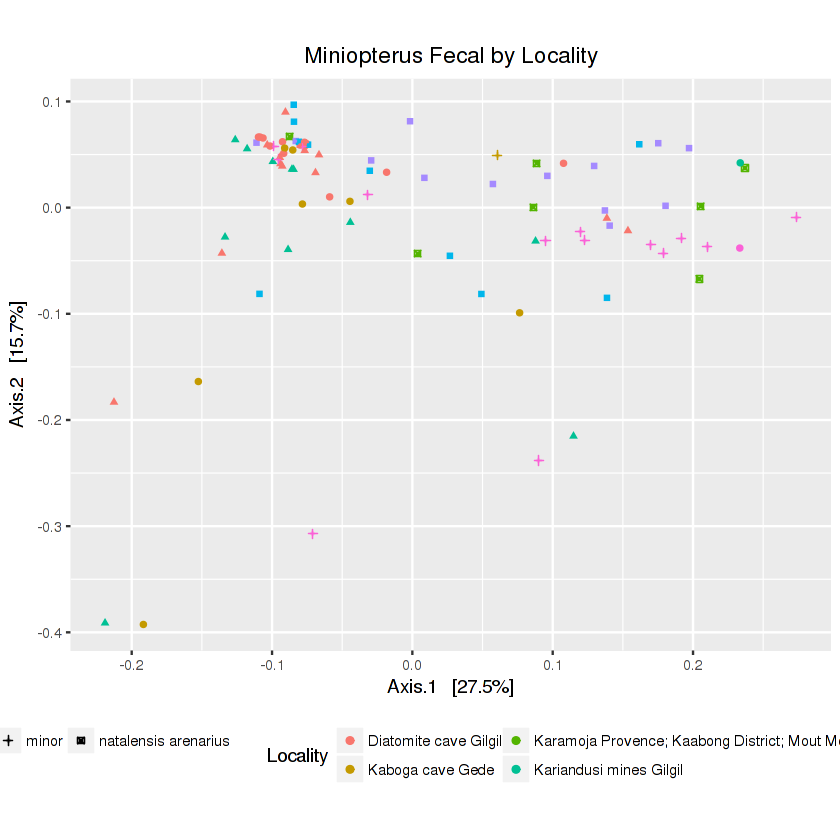

In [14]:
#Miniopterus PCoA wunifrac

p1 = plot_ordination(minifecal, minifecal.out.wuf.log, color = "Locality", shape = "Host_species") 

p1 = p1 + geom_point(size=.5) + coord_fixed(sqrt(minifecal.evals[2] / minifecal.evals[1])) 

p1 = p1 + ggtitle("Miniopterus Fecal by Locality") + theme(legend.position="bottom") 

p1 = p1 + theme(plot.title = element_text(hjust = 0.5))

p1 = p1 #+ stat_ellipse(level=0.95)

saveRDS(p1, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/minifecal/wunifrac/minifecal.pcoa.wunif_bottomlegend.rds")

p1

In [7]:
hippofecal.out.wuf.log = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/hippofecal/wunifrac/hippofecal.out.wuf.log.rds")
hippofecal.evals = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/hippofecal/wunifrac/hippofecal.evals.rds")

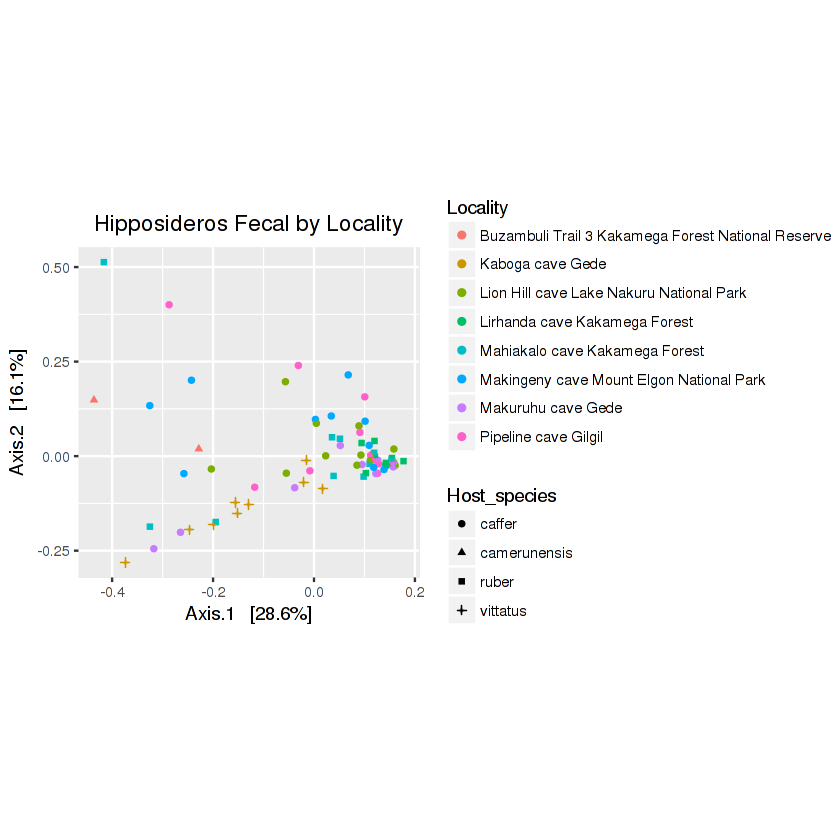

In [10]:
#Hipposideros PCoA wunifrac

p1 = plot_ordination(hippofecal, hippofecal.out.wuf.log, color = "Locality", shape = "Host_species") 

p1 = p1 + geom_point(size=.5) + coord_fixed(sqrt(hippofecal.evals[2] / hippofecal.evals[1])) 

p1 = p1 + ggtitle("Hipposideros Fecal by Locality") #+ theme(legend.position="bottom") 

p1 = p1 + theme(plot.title = element_text(hjust = 0.5))

#p1 = p1 + stat_ellipse(level=0.95)

saveRDS(p1, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/hippofecal/wunifrac/hippofecal.pcoa.wunif_sidelegend")

p1

In [12]:
rhinofecal.out.wuf.log = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rhinofecal/wunifrac/rhinofecal.out.wuf.log.rds")
rhinofecal.evals = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rhinofecal/wunifrac/rhinofecal.evals.rds")

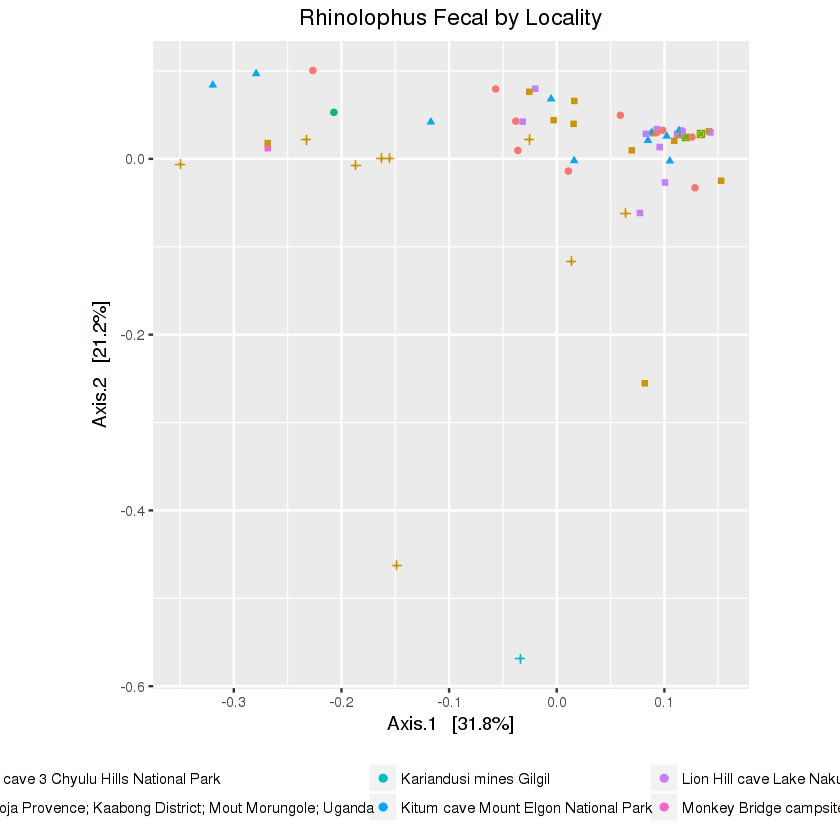

In [20]:
#Rhinolophus PCoA wunifrac

p1 = plot_ordination(rhinofecal, rhinofecal.out.wuf.log, color = "Locality", shape = "Host_species") 

p1 = p1 + geom_point(size=.5) + coord_fixed(sqrt(rhinofecal.evals[2] / rhinofecal.evals[1])) 

p1 = p1 + ggtitle("Rhinolophus Fecal by Locality") + theme(legend.position="bottom") 

p1 = p1 + theme(plot.title = element_text(hjust = 0.5))

#p1 = p1 + stat_ellipse(level=0.95)

saveRDS(p1, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rhinofecal/wunifrac/rhinofecal.pcoa.wunif_bottomlegend.rds")

p1

In [16]:
rousfecal.out.wuf.log = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rousfecal/wunifrac/rousfecal.out.wuf.log.rds")
rousfecal.evals = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rousfecal/wunifrac/rousfecal.evals.rds")

Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse


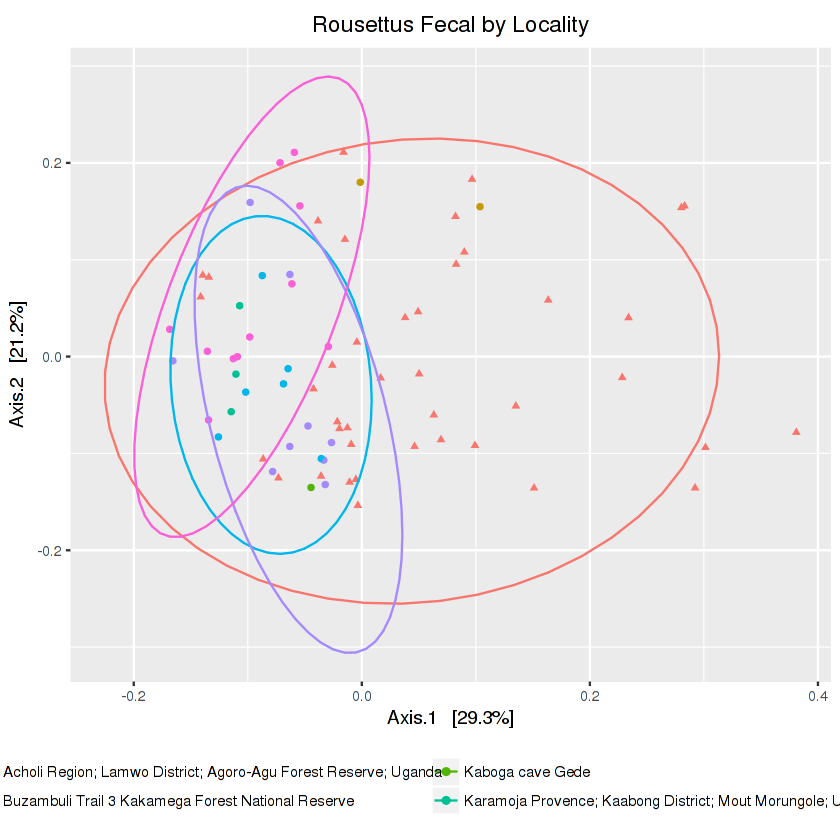

In [21]:
#rouslophus PCoA wunifrac

p1 = plot_ordination(rousfecal, rousfecal.out.wuf.log, color = "Locality", shape = "Host_species") 

p1 = p1 + geom_point(size=.5) + coord_fixed(sqrt(rousfecal.evals[2] / rousfecal.evals[1])) 

p1 = p1 + ggtitle("Rousettus Fecal by Locality") + theme(legend.position="bottom") 

p1 = p1 + theme(plot.title = element_text(hjust = 0.5))

p1 = p1 + stat_ellipse(level=0.95)

saveRDS(p1, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rousfecal/wunifrac/rousfecal.pcoa.wunif_95stat.rds")

p1

In [16]:
batfecal.dist.wunif <- distance(BatFecalFTA, method = "wunifrac", type = "samples")
batfecal.out.wuf.log <- ordinate(BatFecalFTA, method = "PCoA", distance = "wunifrac")
batfecal.evals <- batfecal.out.wuf.log$values$Eigenvalues
batfecal.wuf.pcoa.plot = plot_ordination(BatFecalFTA, batfecal.out.wuf.log, color = "Host_Genus") + ggtitle("Bat Fecal - Weighted Unifrac") + geom_point(size=2) + coord_fixed(sqrt(batfecal.evals[2] / batfecal.evals[1]))

saveRDS(batfecal.dist.wunif, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/wunifrac/batfecal.dist.wunif.rds")
saveRDS(batfecal.out.wuf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/wunifrac/batfecal.out.wuf.log.rds")
saveRDS(batfecal.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/wunifrac/batfecal.wuf.evals.rds")
saveRDS(batfecal.wuf.pcoa.plot, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/wunifrac/batfecal.wuf.pcoa.plot.rds")

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- GACAGAGGATGCAAACGTTGCTCGGAATTACTGGGCGTAAAGCGCGCGCAGGTGGTCCGGTAAGTCGGGTGTGAAATCCCGGGGCTCAACCTCGGAAGTGCACACGATACTGCCAGACTTGAGTACTGGAGAGGAGAGCGGAATTCCCGG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGCAGCGAGCGTTGTTCGGAGTTACTGGGCGTAAAGGGTGTGTAGGCGGTTGTTTAAGTTTGGTGTGAAATCTCCCGGCTCAACTGGGAGGGTGCGCCGAATACTGAATGACTTGGAGTGCGGGAGAGGAAAGTGGAATTCCTG -- in the phylogenetic tree in the data you provided.”

## unweighted unifrac

In [36]:
batfecal.dist.unif <- distance(BatFecalFTA, method = "unifrac", type = "samples")
batfecal.out.uf.log <- ordinate(BatFecalFTA, method = "PCoA", distance = "unifrac")
batfecal.uf.evals <- batfecal.out.uf.log$values$Eigenvalues
batfecal.pcoa.uf.plot = plot_ordination(BatFecalFTA, batfecal.out.uf.log, color = "Loc_name") + ggtitle("Bat Fecal - Unifrac") + geom_point(size=2) + coord_fixed(sqrt(batfecal.uf.evals[2] / batfecal.uf.evals[1])) + 

saveRDS(batfecal.dist, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/unifrac/batfecal.dist.unif.rds")
saveRDS(batfecal.out.uf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/unifrac/batfecal.out.uf.log.rds")
saveRDS(batfecal.uf.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/unifrac/batfecal.uf.evals.rds")
saveRDS(batfecal.pcoa.uf.plot, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/unifrac/pcoa_plots/batfecal.uf.pcoa.plot.rds")

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- CACGTAGGGGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGGTAAGTCGGGTGTGAAAACTCTGGGCTCAACTCAGAGACGCCACCCGATACTGCTATGACTTGAGTCTGGTAGGGGAGTATGGAATTTCCG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTGTCCGGAATCATTGGGCGTAAAGAGCGTGTAGGTGGTTCGGTAAGTCCGCTGTAAAAGTCCAGGGCTCAACCCTGGAAAGCCGGTGGAAACTGTCGAGCTCGAGTCCGGAAGAGGCGAGTGGAATTCCTGG -- in the phylogenetic tree in the data you provided.”Warning message in gzfile(file, mode):
“cannot open compressed file '/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/unifrac/pcoa_plots/batfecal.uf.pcoa.plot.rds', probable reason 'No such file or directory'”

ERROR: Error in gzfile(file, mode): cannot open the connection


### Bray-Curtis

In [39]:
batfecal.dist.bc <- distance(BatFecalFTA, method = "bray", type = "samples")
batfecal.out.bc.log <- ordinate(BatFecalFTA, method = "PCoA", distance = "bray")
batfecal.bc.evals <- batfecal.out.bc.log$values$Eigenvalues
batfecal.pcoa.bc.plot = plot_ordination(BatFecalFTA, batfecal.out.bc.log, color = "Loc_name") + ggtitle("Bat Fecal - Bray-Curtis") + geom_point(size=2) + coord_fixed(sqrt(batfecal.bc.evals[2] / batfecal.bc.evals[1])) + 

saveRDS(batfecal.dist.bc, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/braycurtis/batfecal.dist.bc.rds")
saveRDS(batfecal.out.bc.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/braycurtis/batfecal.out.bc.log.rds")
saveRDS(batfecal.bc.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/braycurtis/batfecal.bc.evals.rds")
saveRDS(batfecal.pcoa.bc.plot, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/braycurtis/batfecal.bc.pcoa.plot.rds")

### NMDS

In [40]:
batfecal.dist.nmds <- distance(BatFecalFTA, method = "bray", type = "samples")
batfecal.out.nmds.log <- ordinate(BatFecalFTA, method = "PCoA", distance = "bray")
batfecal.nmds.evals <- batfecal.out.uf.log$values$Eigenvalues
batfecal.nmds.pcoa.plot = plot_ordination(BatFecalFTA, batfecal.out.nmds.log, color = "Loc_name") + ggtitle("Bat Fecal - NMDS") + geom_point(size=2) + coord_fixed(sqrt(batfecal.nmds.evals[2] / batfecal.nmds.evals[1])) + 

saveRDS(batfecal.dist.nmds, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/nmds/batfecal.dist.nmds.rds")
saveRDS(batfecal.out.nmds.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/nmds/batfecal.out.nmds.log.rds")
saveRDS(batfecal.nmds.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/nmds/batfecal.nmds.evals.rds")
saveRDS(batfecal.nmds.pcoa.plot, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/nmds/batfecal.nmds.pcoa.plot.rds")

# ADONIS (PERMANOVA) tests

*Include Bonferroni correction after calculations:

pval = c("0.001", "0.360", "0.271") | corrected.pvals = p.adjust(pval, method = "bonferroni")

In [41]:
#Transform ps to df for ADONIS test

batfecal.df = data.frame(sample_data(BatFecalFTA))

### wuf adonis

In [49]:
batfecal.wuf.ad.test.1 = adonis(batfecal.dist.wunif ~ Locality + Host_Family + Ecto_status + Haem_status, data=batfecal.df)
batfecal.wuf.ad.test.2 = adonis(batfecal.dist.wunif ~ Locality + Host_Genus + Ecto_status + Haem_status, data=batfecal.df)

saveRDS(batfecal.wuf.ad.test.1, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/adonis/batfecal.wuf.ad.test.1.rds")
saveRDS(batfecal.wuf.ad.test.2, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/adonis/batfecal.wuf.ad.test.2.rds")


### uf adonis

In [55]:
batfecal.uf.ad.test.1 = adonis(batfecal.dist.unif ~ Locality + Host_Family + Ecto_status + Haem_status, data=batfecal.df)
batfecal.uf.ad.test.2 = adonis(batfecal.dist.unif ~ Locality + Host_Genus + Ecto_status + Haem_status, data=batfecal.df)

saveRDS(batfecal.uf.ad.test.1, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/adonis/batfecal.uf.ad.test.1.rds")
saveRDS(batfecal.uf.ad.test.2, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/adonis/batfecal.uf.ad.test.2.rds")


### bc adonis

In [56]:
batfecal.bc.ad.test.1 = adonis(batfecal.dist.bc ~ Locality + Host_Family + Ecto_status + Haem_status, data=batfecal.df)
batfecal.bc.ad.test.2 = adonis(batfecal.dist.bc ~ Locality + Host_Genus + Ecto_status + Haem_status, data=batfecal.df)

saveRDS(batfecal.bc.ad.test.1, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/adonis/batfecal.bc.ad.test.1.rds")
saveRDS(batfecal.bc.ad.test.2, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/adonis/batfecal.bc.ad.test.2.rds")


### Results

In [57]:
# wuf adonis

batfecal.wuf.ad.test.1
batfecal.wuf.ad.test.2


Call:
adonis(formula = batfecal.dist.wunif ~ Locality + Host_Family +      Ecto_status + Haem_status, data = batfecal.df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Locality     17     7.429 0.43700  4.9150 0.17261  0.001 ***
Host_Family   8     2.024 0.25302  2.8457 0.04703  0.001 ***
Ecto_status   1     0.067 0.06703  0.7539 0.00156  0.621    
Haem_status   1     0.178 0.17796  2.0016 0.00413  0.049 *  
Residuals   375    33.342 0.08891         0.77467           
Total       402    43.040                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = batfecal.dist.wunif ~ Locality + Host_Genus +      Ecto_status + Haem_status, data = batfecal.df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Locality     17     7.429 0.43700  5.0977 0.17261  0.001 ***
Host_Genus   17     4.107 0.24160  2.8183 0.09543  0.001 ***
Ecto_status   1     0.041 0.04099  0.4782 0.00095  0.895    
Haem_status   1     0.087 0.08746  1.0202 0.00203  0.389    
Residuals   366    31.375 0.08572         0.72898           
Total       402    43.040                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [58]:
# uf adonis

batfecal.uf.ad.test.1
batfecal.uf.ad.test.2


Call:
adonis(formula = batfecal.dist.unif ~ Locality + Host_Family +      Ecto_status + Haem_status, data = batfecal.df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Locality     17    15.343 0.90254  4.2269 0.15333  0.001 ***
Host_Family   8     4.112 0.51396  2.4070 0.04109  0.001 ***
Ecto_status   1     0.242 0.24187  1.1328 0.00242  0.226    
Haem_status   1     0.298 0.29768  1.3941 0.00297  0.070 .  
Residuals   375    80.071 0.21352         0.80019           
Total       402   100.065                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = batfecal.dist.unif ~ Locality + Host_Genus +      Ecto_status + Haem_status, data = batfecal.df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Locality     17    15.343 0.90254  4.2667 0.15333  0.001 ***
Host_Genus   17     6.798 0.39989  1.8905 0.06794  0.001 ***
Ecto_status   1     0.218 0.21808  1.0310 0.00218  0.375    
Haem_status   1     0.285 0.28548  1.3496 0.00285  0.058 .  
Residuals   366    77.421 0.21153         0.77370           
Total       402   100.065                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [59]:
# bc adonis

batfecal.bc.ad.test.1
batfecal.bc.ad.test.2


Call:
adonis(formula = batfecal.dist.bc ~ Locality + Host_Family +      Ecto_status + Haem_status, data = batfecal.df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Locality     17    25.504 1.50026  4.1555 0.14844  0.001 ***
Host_Family   8     9.159 1.14491  3.1713 0.05331  0.001 ***
Ecto_status   1     0.565 0.56501  1.5650 0.00329  0.048 *  
Haem_status   1     1.207 1.20653  3.3419 0.00702  0.001 ***
Residuals   375   135.385 0.36103         0.78795           
Total       402   171.820                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = batfecal.dist.bc ~ Locality + Host_Genus + Ecto_status +      Haem_status, data = batfecal.df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Locality     17    25.504 1.50026  4.2732 0.14844  0.001 ***
Host_Genus   17    16.619 0.97761  2.7845 0.09672  0.001 ***
Ecto_status   1     0.365 0.36479  1.0390 0.00212  0.377    
Haem_status   1     0.835 0.83469  2.3775 0.00486  0.002 ** 
Residuals   366   128.497 0.35109         0.74786           
Total       402   171.820                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [25]:
#Bonferonni Correction
pval = c("0.001", "0.001", "0.871", "0.367")
pval

[1] "0.001" "0.001" "0.871" "0.367"

In [26]:
corr.makact.ad.test = p.adjust(pval, method = "bonferroni")
corr.makact.ad.test

[1] 0.004 0.004 1.000 1.000